In [5]:
import pandas as pd

# Load your dataset from an Excel file
file_path = '/content/Data_Train.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Get information about the dataset
print("\nDataset information:")
print(data.info())

# Summary statistics of numerical features
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Check the data types of features
print("\nData types:")
print(data.dtypes)

print("\nData columns:")
print(data.columns)

First few rows of the dataset:
                                        Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition             Reviews              Ratings  \
0  Paperback,– 10 Mar 2016  4.0 out of 5 stars   8 customer reviews   
1   Paperback,– 7 Nov 2012  3.9 out of 5 stars  14 customer reviews   
2  Paperback,– 25 Feb 1982  4.8 out of 5 stars   6 customer reviews   
3   Paperback,– 5 Oct 2017  4.1 out of 5 stars  13 customer reviews   
4  Hardcover,– 10 Oct 2006  5.0 out of 5 stars    1 customer review   

                                            Synopsis  \
0  THE HUNTERS return in their third brilliant no...   
1  A layered portrait of a troubl

In [6]:
# Feature Cross 1: Author and Genre Interaction
data['Author_Genre_Cross'] = data['Author'] + '_' + data['Genre']

# Feature Cross 2: Reviews and Ratings Interaction
data['Reviews_Ratings_Cross'] = data['Reviews'] + '_' + data['Ratings']

# Feature Cross 3: BookCategory and Genre Interaction
data['BookCategory_Genre_Cross'] = data['BookCategory'] + '_' + data['Genre']

# Feature Cross 4: Edition and Reviews Interaction
data['Edition_Reviews_Cross'] = data['Edition'] + '_' + data['Reviews']

# Feature Cross 5: Title and Author Interaction
data['Title_Author_Cross'] = data['Title'] + '_' + data['Author']

# Display the modified dataset
print(data.head())

                                        Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition             Reviews              Ratings  \
0  Paperback,– 10 Mar 2016  4.0 out of 5 stars   8 customer reviews   
1   Paperback,– 7 Nov 2012  3.9 out of 5 stars  14 customer reviews   
2  Paperback,– 25 Feb 1982  4.8 out of 5 stars   6 customer reviews   
3   Paperback,– 5 Oct 2017  4.1 out of 5 stars  13 customer reviews   
4  Hardcover,– 10 Oct 2006  5.0 out of 5 stars    1 customer review   

                                            Synopsis  \
0  THE HUNTERS return in their third brilliant no...   
1  A layered portrait of a troubled genius for wh...   
2  "Duri

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
# Feature Cross 1: Author and Genre Interaction
data['Author_Genre_Cross'] = data['Author'] + '_' + data['Genre']

# Feature Cross 2: Reviews and Ratings Interaction
data['Reviews_Ratings_Cross'] = data['Reviews'] + '_' + data['Ratings']

# Feature Cross 3: BookCategory and Genre Interaction
data['BookCategory_Genre_Cross'] = data['BookCategory'] + '_' + data['Genre']

# Feature Cross 4: Edition and Reviews Interaction
data['Edition_Reviews_Cross'] = data['Edition'] + '_' + data['Reviews']

# Feature Cross 5: Title and Author Interaction
data['Title_Author_Cross'] = data['Title'] + '_' + data['Author']


In [9]:
# Select features
features = ['Reviews', 'Ratings', 'Genre', 'BookCategory', 'Price']

# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data[features])

# Split into X and y
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Make predictions
predictions = model.predict(X_test)


Mean Absolute Error (MAE): 537701081547580.44
Mean Squared Error (MSE): 10586065307838215518266205405184.00
Root Mean Squared Error (RMSE): 3253623412111213.50
R-squared (R2): -29515919310015133162405888.00


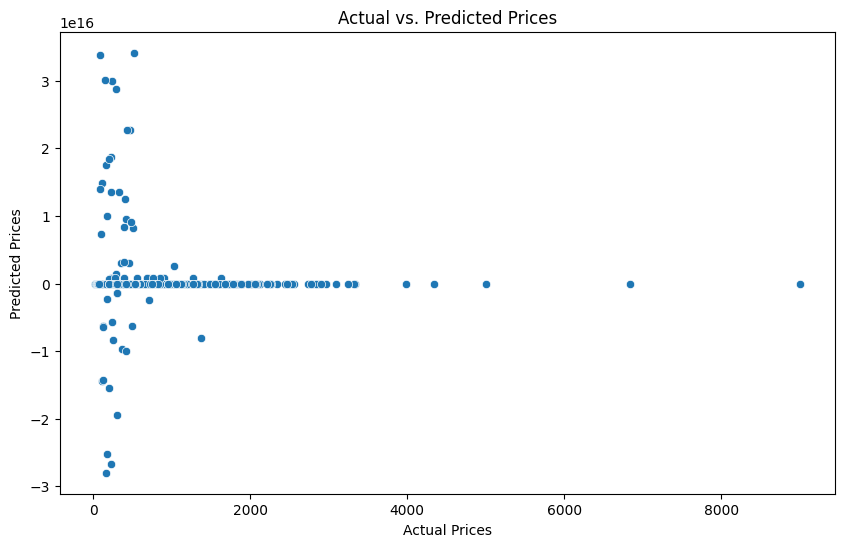

In [12]:
# Evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [13]:
# Check for NaN or infinite values in the target variable
print("NaN values in 'Price':", data['Price'].isna().any())
print("Infinite values in 'Price':", ~pd.notna(data['Price']).all())


NaN values in 'Price': False
Infinite values in 'Price': False


In [14]:
print(data['Price'].describe())


count     5699.000000
mean       554.857428
std        674.363427
min         25.000000
25%        249.000000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64


In [15]:
# Select features without feature crosses
features_simple = ['Reviews', 'Ratings']

# Convert categorical features to numerical using one-hot encoding
data_encoded_simple = pd.get_dummies(data[features_simple])

# Split into X and y
X_simple = data_encoded_simple
y_simple = data['Price']

# Train-test split
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Train the model without feature crosses
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)

# Make predictions
predictions_simple = model_simple.predict(X_test_simple)

# Evaluate the model
mae_simple = mean_absolute_error(y_test_simple, predictions_simple)
mse_simple = mean_squared_error(y_test_simple, predictions_simple)
rmse_simple = mean_squared_error(y_test_simple, predictions_simple, squared=False)
r2_simple = r2_score(y_test_simple, predictions_simple)

# Print the evaluation metrics for the simplified model
print(f"Simplified Model - Mean Absolute Error (MAE): {mae_simple:.2f}")
print(f"Simplified Model - Mean Squared Error (MSE): {mse_simple:.2f}")
print(f"Simplified Model - Root Mean Squared Error (RMSE): {rmse_simple:.2f}")
print(f"Simplified Model - R-squared (R2): {r2_simple:.2f}")


Simplified Model - Mean Absolute Error (MAE): 437620707264.52
Simplified Model - Mean Squared Error (MSE): 36876717045472381013852160.00
Simplified Model - Root Mean Squared Error (RMSE): 6072620278386.62
Simplified Model - R-squared (R2): -102819146971113422848.00


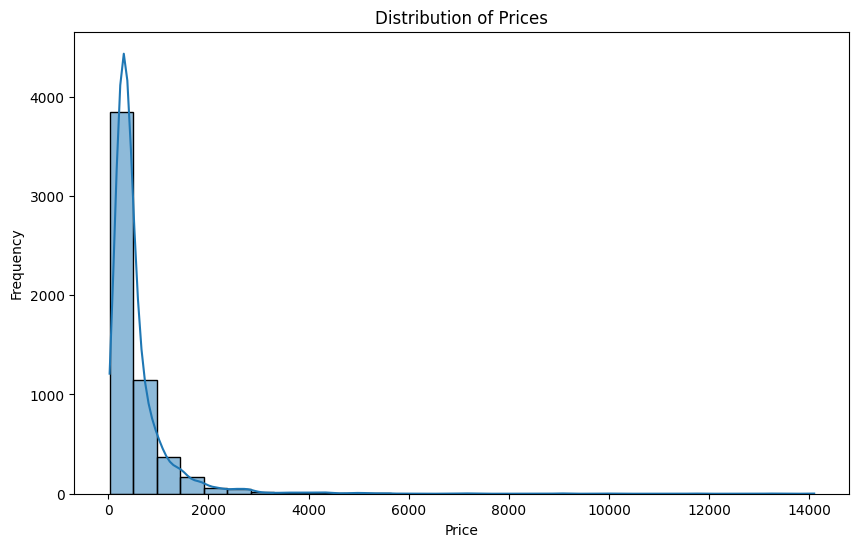

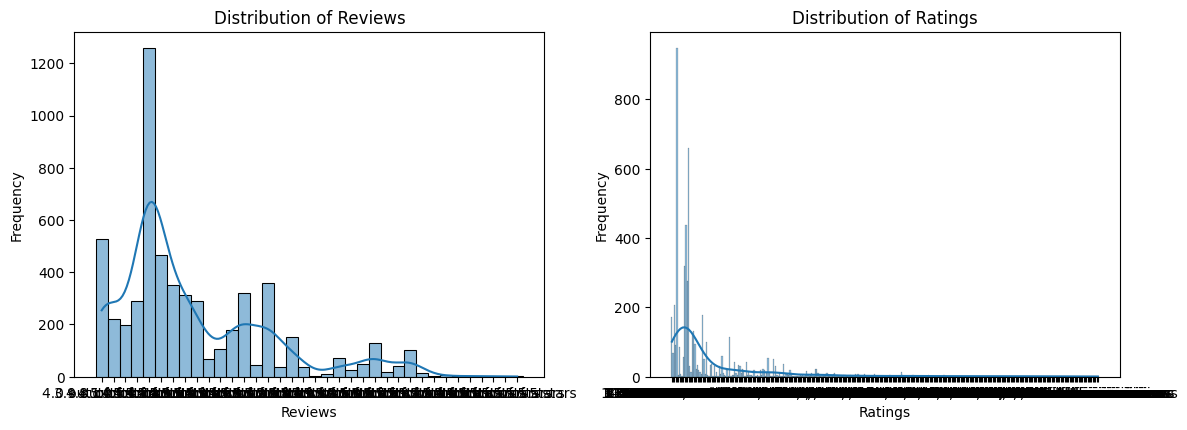

In [16]:
# Plot the distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Explore numerical feature distributions
numerical_features = ['Reviews', 'Ratings']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Mean Absolute Error (MAE): 64298318490818.96
Mean Squared Error (MSE): 204581463622070059551137202176.00
Root Mean Squared Error (RMSE): 452306824646798.88
R-squared (R2): -570411177052045087604736.00


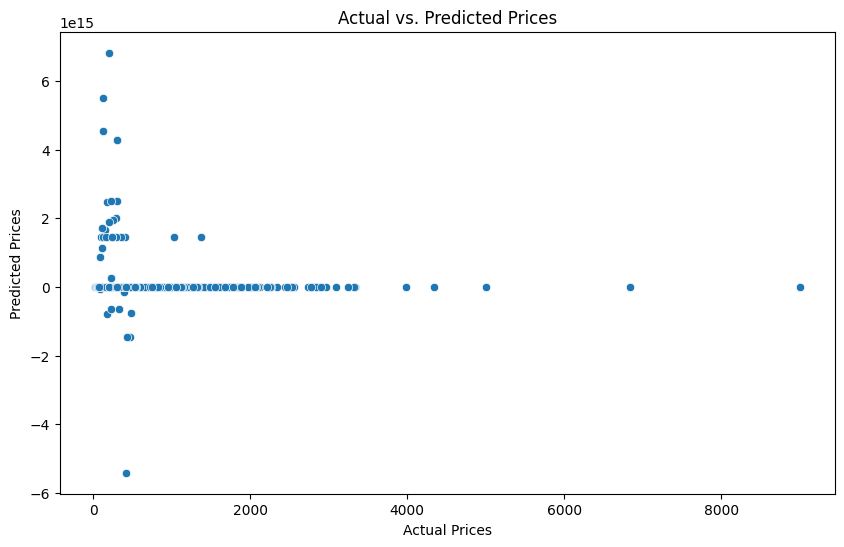

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Data_Train.xlsx'
data = pd.read_excel(file_path)

# Feature Engineering - Select relevant features
features = ['Reviews', 'Ratings']

# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data[features])

# Split into X and y
X = data_encoded
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


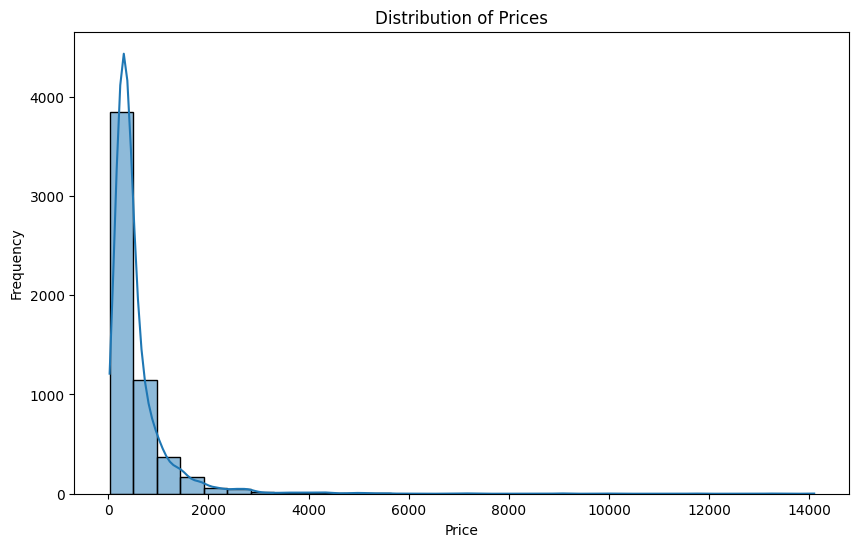

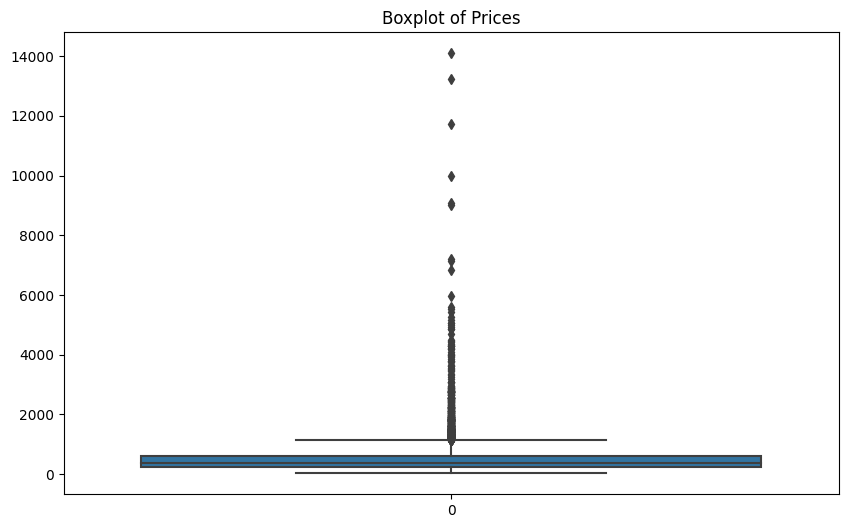

Mean Absolute Error (MAE): 437620707264.52
Mean Squared Error (MSE): 36876717045469078184001536.00
Root Mean Squared Error (RMSE): 6072620278386.35
R-squared (R2): -102819146971104215040.00


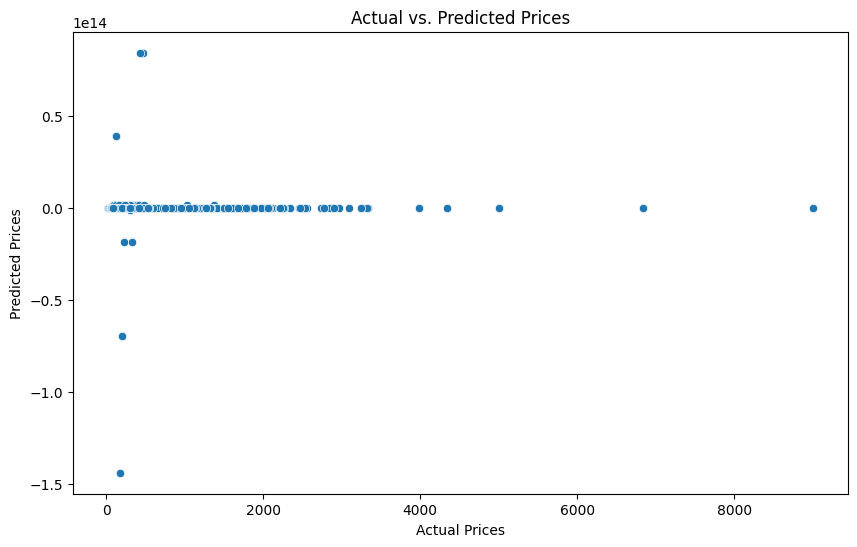

In [18]:
# Explore the distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Check for outliers in the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(data['Price'])
plt.title('Boxplot of Prices')
plt.show()

# Scale the target variable using RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data['Scaled_Price'] = scaler.fit_transform(data[['Price']])

# Feature Engineering - Select relevant features
features = ['Reviews', 'Ratings']

# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data[features])

# Split into X and y
X = data_encoded
y_scaled = data['Scaled_Price']  # Use the scaled target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions_scaled = model.predict(X_test)

# Inverse transform predictions to get them back to the original scale
predictions_original_scale = scaler.inverse_transform(predictions_scaled.reshape(-1, 1))

# Evaluate the model on the original scale
mae = mean_absolute_error(data['Price'][y_test.index], predictions_original_scale)
mse = mean_squared_error(data['Price'][y_test.index], predictions_original_scale)
rmse = mean_squared_error(data['Price'][y_test.index], predictions_original_scale, squared=False)
r2 = r2_score(data['Price'][y_test.index], predictions_original_scale)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Price'][y_test.index], y=predictions_original_scale.flatten())
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [19]:
# Identify outliers in the target variable 'Price'
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]

# Print the number of outliers and their details
print(f"Number of outliers: {len(outliers)}")
print("\nOutliers:")
print(outliers[['Title', 'Author', 'Price']])


Number of outliers: 537

Outliers:
                                                  Title  \
27                                   The Buddha Box Set   
34                The Art of Uncharted 4: A Thief's End   
41                                                   S.   
49    Mastering Manga with Mark Crilley: 30 Drawing ...   
77                                 Art: A World History   
...                                                 ...   
5658                         Drawing the Head and Hands   
5669                     Season of Storms (The Witcher)   
5670                                          Dear Data   
5679                  Alexander McQueen – Savage Beauty   
5684  Guitar Exercises For Dummies (For Dummies Series)   

                                                 Author   Price  
27                                         Osamu Tezuka  3779.0  
34                                          Naughty Dog  1780.0  
41                                           Doug Dorst  1

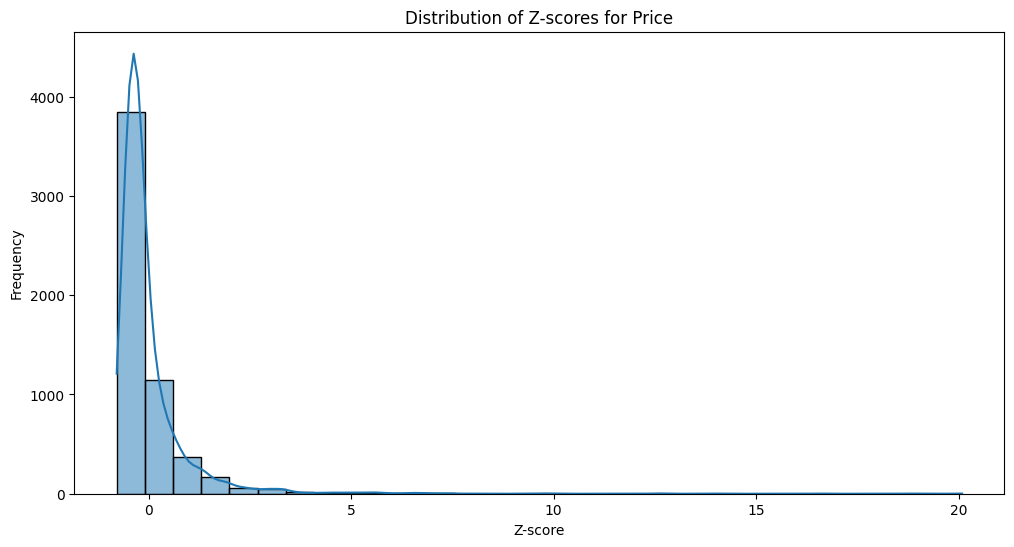

In [20]:
from scipy.stats import zscore

# Calculate Z-scores for the 'Price' variable
data['Price_Zscore'] = zscore(data['Price'])

# Visualize the distribution of Z-scores
plt.figure(figsize=(12, 6))
sns.histplot(data['Price_Zscore'], bins=30, kde=True)
plt.title('Distribution of Z-scores for Price')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()


Model Without Outliers - Mean Absolute Error (MAE): 9724864564559.35
Model Without Outliers - Mean Squared Error (MSE): 54214347551066688268303073280.00
Model Without Outliers - Root Mean Squared Error (RMSE): 232839746501894.91
Model Without Outliers - R-squared (R2): -313919505448358125764608.00


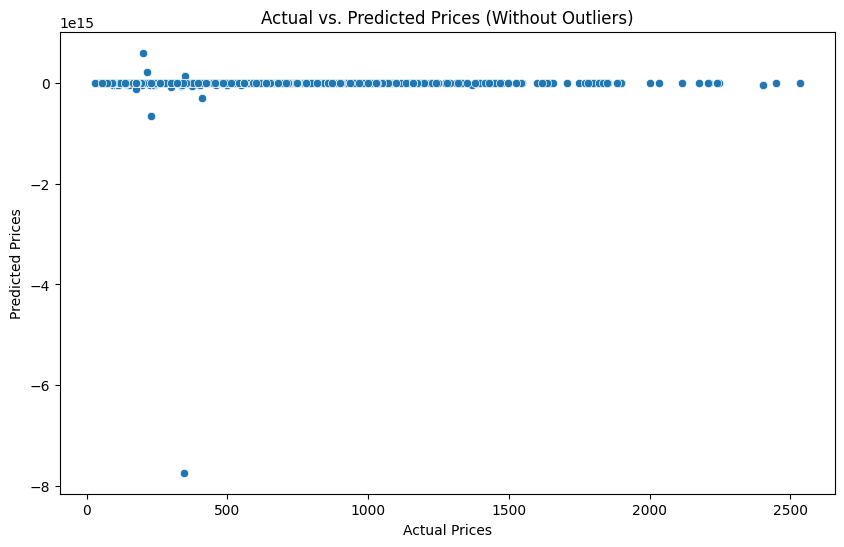

In [21]:
# Set a Z-score threshold for identifying outliers
zscore_threshold = 3.0

# Identify outliers based on Z-scores
outliers_zscore = data[data['Price_Zscore'] > zscore_threshold]

# Remove outliers from the dataset
data_no_outliers = data[data['Price_Zscore'] <= zscore_threshold]

# Feature Engineering - Select relevant features
features = ['Reviews', 'Ratings']

# Convert categorical features to numerical using one-hot encoding
data_encoded_no_outliers = pd.get_dummies(data_no_outliers[features])

# Split into X and y
X_no_outliers = data_encoded_no_outliers
y_no_outliers = data_no_outliers['Price']

# Train-test split
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Train the model without outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test set
predictions_no_outliers = model_no_outliers.predict(X_test_no_outliers)

# Evaluate the model without outliers
mae_no_outliers = mean_absolute_error(y_test_no_outliers, predictions_no_outliers)
mse_no_outliers = mean_squared_error(y_test_no_outliers, predictions_no_outliers)
rmse_no_outliers = mean_squared_error(y_test_no_outliers, predictions_no_outliers, squared=False)
r2_no_outliers = r2_score(y_test_no_outliers, predictions_no_outliers)

# Print the evaluation metrics without outliers
print(f"Model Without Outliers - Mean Absolute Error (MAE): {mae_no_outliers:.2f}")
print(f"Model Without Outliers - Mean Squared Error (MSE): {mse_no_outliers:.2f}")
print(f"Model Without Outliers - Root Mean Squared Error (RMSE): {rmse_no_outliers:.2f}")
print(f"Model Without Outliers - R-squared (R2): {r2_no_outliers:.2f}")

# Visualize predictions vs. actual values without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_no_outliers, y=predictions_no_outliers)
plt.title('Actual vs. Predicted Prices (Without Outliers)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


Random Forest Model Without Outliers - Mean Absolute Error (MAE): 279.26
Random Forest Model Without Outliers - Mean Squared Error (MSE): 168189.10
Random Forest Model Without Outliers - Root Mean Squared Error (RMSE): 410.11
Random Forest Model Without Outliers - R-squared (R2): 0.03


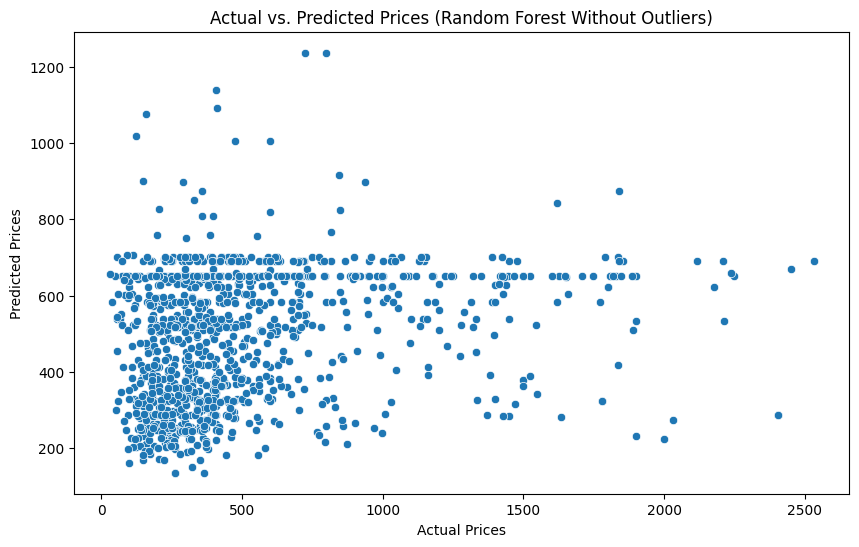

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model without outliers
model_rf_no_outliers = RandomForestRegressor(random_state=42)
model_rf_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test set
predictions_rf_no_outliers = model_rf_no_outliers.predict(X_test_no_outliers)

# Evaluate the Random Forest model without outliers
mae_rf_no_outliers = mean_absolute_error(y_test_no_outliers, predictions_rf_no_outliers)
mse_rf_no_outliers = mean_squared_error(y_test_no_outliers, predictions_rf_no_outliers)
rmse_rf_no_outliers = mean_squared_error(y_test_no_outliers, predictions_rf_no_outliers, squared=False)
r2_rf_no_outliers = r2_score(y_test_no_outliers, predictions_rf_no_outliers)

# Print the evaluation metrics for the Random Forest model without outliers
print(f"Random Forest Model Without Outliers - Mean Absolute Error (MAE): {mae_rf_no_outliers:.2f}")
print(f"Random Forest Model Without Outliers - Mean Squared Error (MSE): {mse_rf_no_outliers:.2f}")
print(f"Random Forest Model Without Outliers - Root Mean Squared Error (RMSE): {rmse_rf_no_outliers:.2f}")
print(f"Random Forest Model Without Outliers - R-squared (R2): {r2_rf_no_outliers:.2f}")

# Visualize predictions vs. actual values for Random Forest model without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_no_outliers, y=predictions_rf_no_outliers)
plt.title('Actual vs. Predicted Prices (Random Forest Without Outliers)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


### feature crosses

In [23]:
# Feature Engineering - Extract numerical values from 'Reviews' and 'Ratings'
data_no_outliers['Reviews'] = data_no_outliers['Reviews'].str.extract('(\d+\.\d+)').astype(float)
data_no_outliers['Ratings'] = data_no_outliers['Ratings'].str.extract('(\d+)').astype(float)

# Create feature crosses
data_no_outliers['Reviews_Ratings_Cross'] = data_no_outliers['Reviews'].astype(str) + "_" + data_no_outliers['Ratings'].astype(str)

# Convert categorical features to numerical using one-hot encoding
data_encoded_cross = pd.get_dummies(data_no_outliers[['Reviews_Ratings_Cross']])

# Combine the one-hot encoded features with the existing features
data_combined = pd.concat([data_no_outliers, data_encoded_cross], axis=1)

# Select relevant features including the new feature crosses
features_with_crosses = ['Reviews', 'Ratings'] + list(data_encoded_cross.columns)

# Split into X and y
X_with_crosses = data_combined[features_with_crosses]
y_with_crosses = data_combined['Price']

# Train-test split
X_train_with_crosses, X_test_with_crosses, y_train_with_crosses, y_test_with_crosses = train_test_split(
    X_with_crosses, y_with_crosses, test_size=0.2, random_state=42)

# Train the Random Forest model with feature crosses
model_rf_with_crosses = RandomForestRegressor(random_state=42)
model_rf_with_crosses.fit(X_train_with_crosses, y_train_with_crosses)

# Make predictions on the test set
predictions_rf_with_crosses = model_rf_with_crosses.predict(X_test_with_crosses)

# Evaluate the Random Forest model with feature crosses
mae_rf_with_crosses = mean_absolute_error(y_test_with_crosses, predictions_rf_with_crosses)
mse_rf_with_crosses = mean_squared_error(y_test_with_crosses, predictions_rf_with_crosses)
rmse_rf_with_crosses = mean_squared_error(y_test_with_crosses, predictions_rf_with_crosses, squared=False)
r2_rf_with_crosses = r2_score(y_test_with_crosses, predictions_rf_with_crosses)

# Print the evaluation metrics for the Random Forest model with feature crosses
print(f"Random Forest Model With Feature Crosses - Mean Absolute Error (MAE): {mae_rf_with_crosses:.2f}")
print(f"Random Forest Model With Feature Crosses - Mean Squared Error (MSE): {mse_rf_with_crosses:.2f}")
print(f"Random Forest Model With Feature Crosses - Root Mean Squared Error (RMSE): {rmse_rf_with_crosses:.2f}")
print(f"Random Forest Model With Feature Crosses - R-squared (R2): {r2_rf_with_crosses:.2f}")


<ipython-input-23-15b947349dae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Reviews'] = data_no_outliers['Reviews'].str.extract('(\d+\.\d+)').astype(float)
<ipython-input-23-15b947349dae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Ratings'] = data_no_outliers['Ratings'].str.extract('(\d+)').astype(float)
<ipython-input-23-15b947349dae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Random Forest Model With Feature Crosses - Mean Absolute Error (MAE): 279.21
Random Forest Model With Feature Crosses - Mean Squared Error (MSE): 169349.03
Random Forest Model With Feature Crosses - Root Mean Squared Error (RMSE): 411.52
Random Forest Model With Feature Crosses - R-squared (R2): 0.02


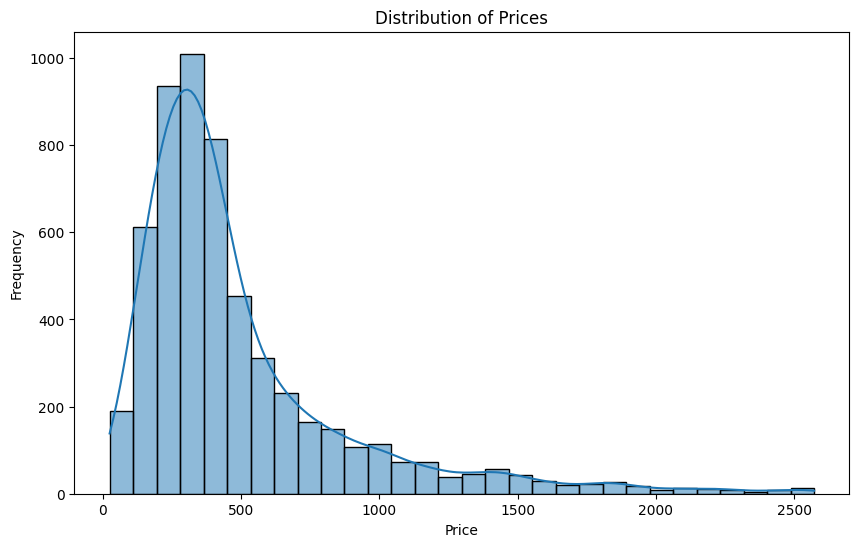

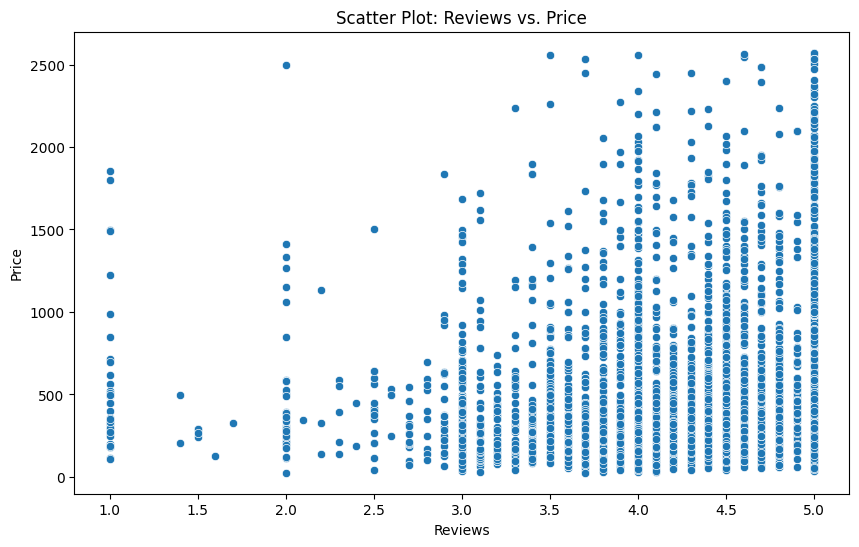

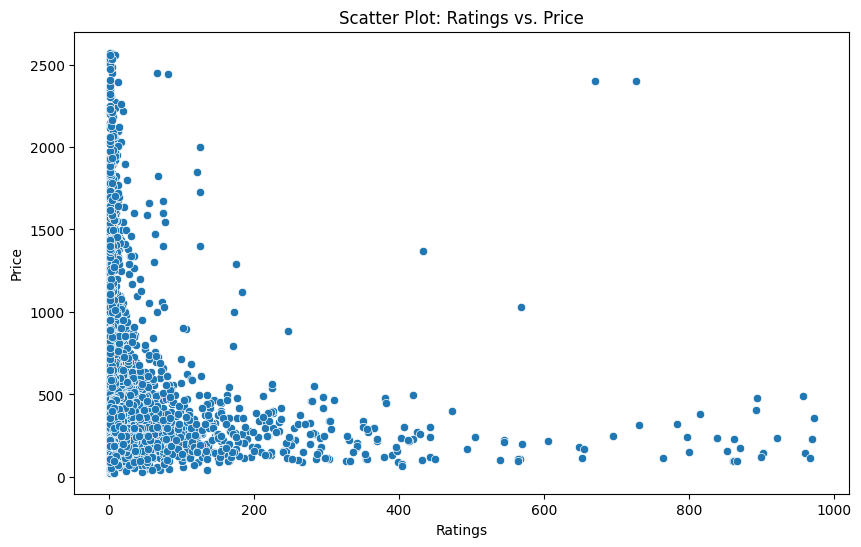

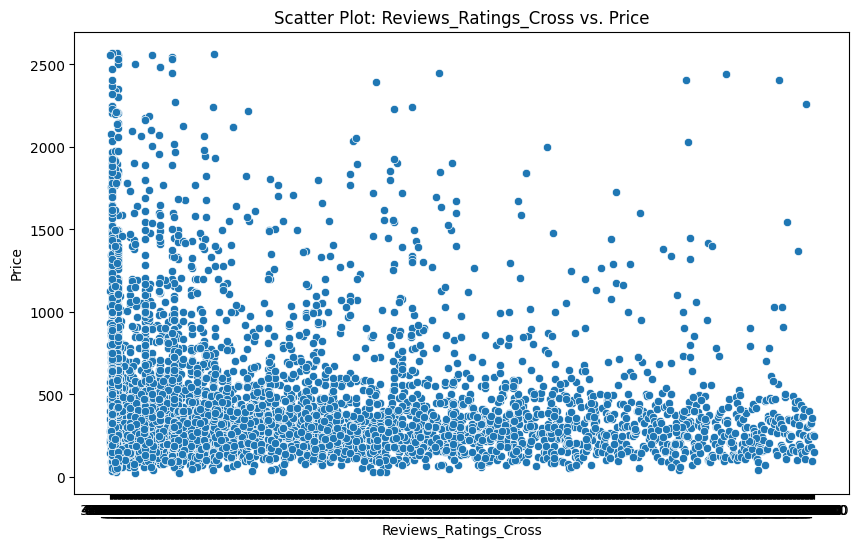

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers['Price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for 'Reviews' vs. 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Price', data=data_no_outliers)
plt.title('Scatter Plot: Reviews vs. Price')
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.show()

# Scatter plot for 'Ratings' vs. 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Price', data=data_no_outliers)
plt.title('Scatter Plot: Ratings vs. Price')
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.show()

# Scatter plot for 'Reviews_Ratings_Cross' vs. 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews_Ratings_Cross', y='Price', data=data_no_outliers)
plt.title('Scatter Plot: Reviews_Ratings_Cross vs. Price')
plt.xlabel('Reviews_Ratings_Cross')
plt.ylabel('Price')
plt.show()


In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = '/content/Data_Train.xlsx'
data = pd.read_excel(file_path)

# Extract the publication year from the "Edition" column
data['Publication_Year'] = data['Edition'].str.extract(r'(\d{4})')

# Drop rows with missing publication year
data.dropna(subset=['Publication_Year'], inplace=True)

# Convert the publication year to numeric
data['Publication_Year'] = pd.to_numeric(data['Publication_Year'])

# Feature Engineering - Extract numerical values from 'Reviews' and 'Ratings'
data['Reviews'] = data['Reviews'].str.extract('(\d+\.\d+)').astype(float)
data['Ratings'] = data['Ratings'].str.extract('(\d+)').astype(float)

# Feature Engineering - Create feature crosses
data['Reviews_Ratings_Cross'] = data['Reviews'].astype(str) + "_" + data['Ratings'].astype(str)

# Select relevant features
features = ['Reviews', 'Ratings', 'Publication_Year']

# Split into X and y
X = data[features]
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model with the new feature
model_rf_with_year = RandomForestRegressor(random_state=42)
model_rf_with_year.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf_with_year = model_rf_with_year.predict(X_test)

# Evaluate the Random Forest model with the new feature
mae_rf_with_year = mean_absolute_error(y_test, predictions_rf_with_year)
mse_rf_with_year = mean_squared_error(y_test, predictions_rf_with_year)
rmse_rf_with_year = mean_squared_error(y_test, predictions_rf_with_year, squared=False)
r2_rf_with_year = r2_score(y_test, predictions_rf_with_year)

# Print the evaluation metrics for the Random Forest model with the new feature
print(f"Random Forest Model With Publication Year - Mean Absolute Error (MAE): {mae_rf_with_year:.2f}")
print(f"Random Forest Model With Publication Year - Mean Squared Error (MSE): {mse_rf_with_year:.2f}")
print(f"Random Forest Model With Publication Year - Root Mean Squared Error (RMSE): {rmse_rf_with_year:.2f}")
print(f"Random Forest Model With Publication Year - R-squared (R2): {r2_rf_with_year:.2f}")


Random Forest Model With Publication Year - Mean Absolute Error (MAE): 330.41
Random Forest Model With Publication Year - Mean Squared Error (MSE): 410819.53
Random Forest Model With Publication Year - Root Mean Squared Error (RMSE): 640.95
Random Forest Model With Publication Year - R-squared (R2): -0.30


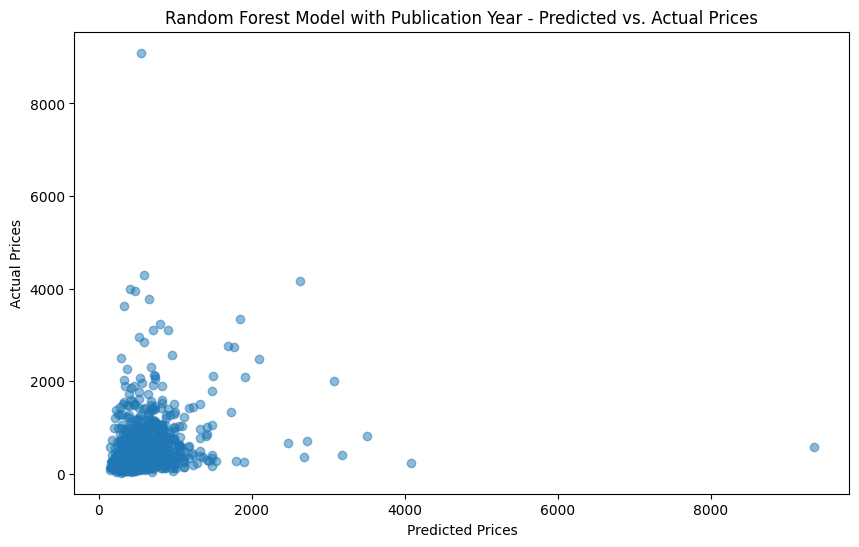

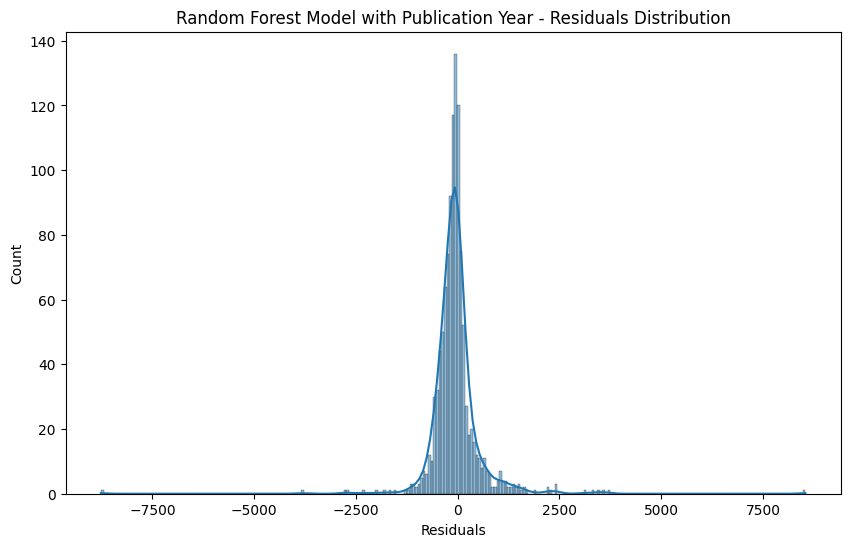

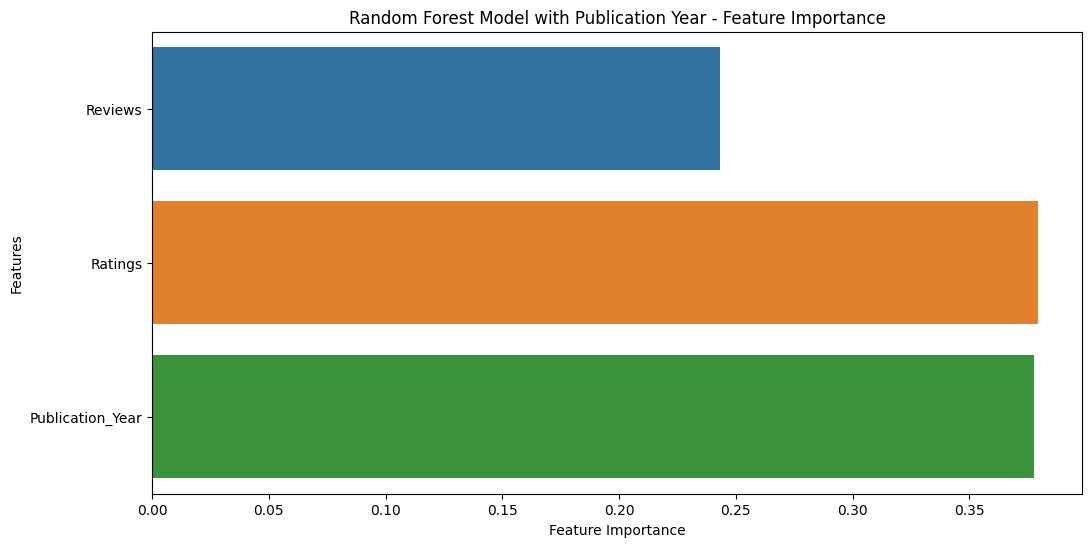

In [26]:
# Evaluate the model
residuals = y_test - predictions_rf_with_year

# Scatter plot of predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(predictions_rf_with_year, y_test, alpha=0.5)
plt.title('Random Forest Model with Publication Year - Predicted vs. Actual Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.show()

# Residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Random Forest Model with Publication Year - Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

# Feature Importance
feature_importance = model_rf_with_year.feature_importances_
features = X_train.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=features, orient='h')
plt.title('Random Forest Model with Publication Year - Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

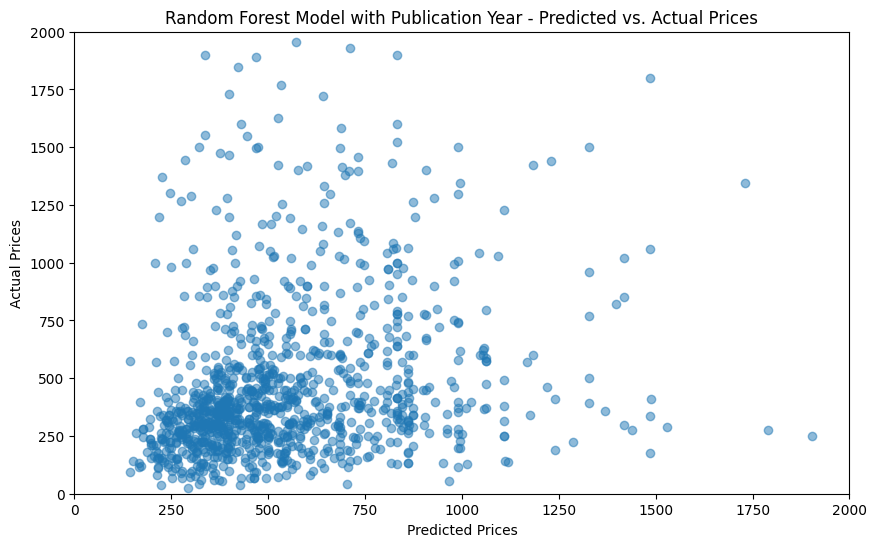

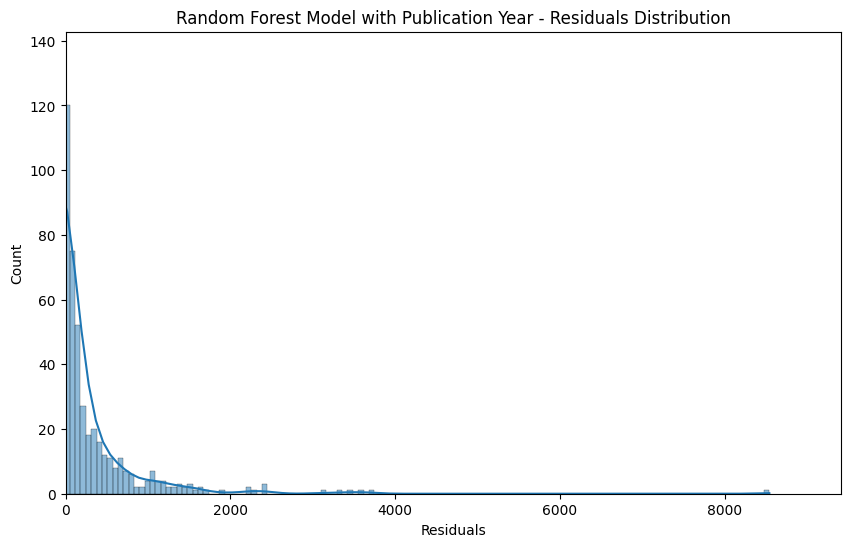

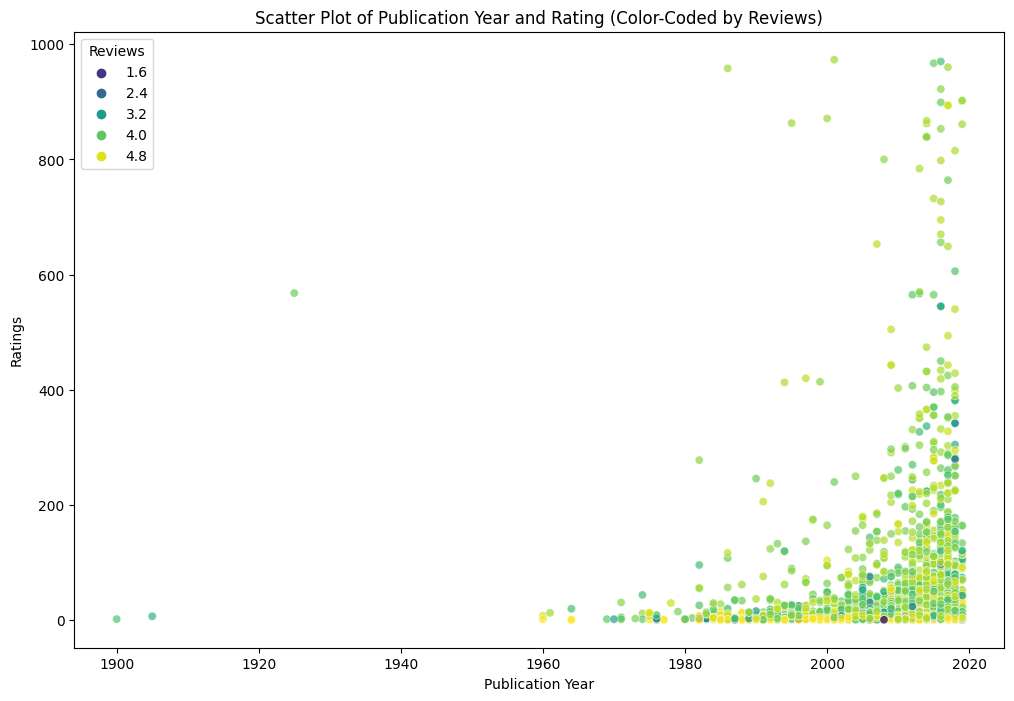

In [27]:
# Plot 1: Scatter plot with a range from 0 to 2000
plt.figure(figsize=(10, 6))
plt.scatter(predictions_rf_with_year, y_test, alpha=0.5)
plt.title('Random Forest Model with Publication Year - Predicted vs. Actual Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.xlim(0, 2000)
plt.ylim(0, 2000)
plt.show()

# Plot 2: Residuals distribution plot starting from 0
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Random Forest Model with Publication Year - Residuals Distribution')
plt.xlabel('Residuals')
plt.xlim(0)
plt.show()

# Plot 3: Scatter plot comparing publication year and rating, color-coded by reviews
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Publication_Year', y='Ratings', hue='Reviews', data=data, palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Publication Year and Rating (Color-Coded by Reviews)')
plt.xlabel('Publication Year')
plt.ylabel('Ratings')
plt.show()



In [32]:
# Feature Engineering - Create 'Avg_Word_Length' feature
data['Avg_Word_Length'] = data['Synopsis'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

# Select relevant features including the new feature
features_with_avg_word_length = ['Reviews', 'Ratings', 'Title_Length', 'Synopsis_Length', 'Avg_Word_Length']

# Split into X and y
X_with_avg_word_length = data[features_with_avg_word_length]
y_with_avg_word_length = data['Price']

# Train-test split
X_train_with_avg_word_length, X_test_with_avg_word_length, y_train_with_avg_word_length, y_test_with_avg_word_length = train_test_split(
    X_with_avg_word_length, y_with_avg_word_length, test_size=0.2, random_state=42
)

# Train the Random Forest model with the new feature 'Avg_Word_Length'
model_rf_with_avg_word_length = RandomForestRegressor(random_state=42)
model_rf_with_avg_word_length.fit(X_train_with_avg_word_length, y_train_with_avg_word_length)

# Make predictions on the test set
predictions_rf_with_avg_word_length = model_rf_with_avg_word_length.predict(X_test_with_avg_word_length)

# Evaluate the Random Forest model with the new feature 'Avg_Word_Length'
mae_rf_with_avg_word_length = mean_absolute_error(y_test_with_avg_word_length, predictions_rf_with_avg_word_length)
mse_rf_with_avg_word_length = mean_squared_error(y_test_with_avg_word_length, predictions_rf_with_avg_word_length)
rmse_rf_with_avg_word_length = mean_squared_error(y_test_with_avg_word_length, predictions_rf_with_avg_word_length, squared=False)
r2_rf_with_avg_word_length = r2_score(y_test_with_avg_word_length, predictions_rf_with_avg_word_length)

# Print the evaluation metrics for the Random Forest model with 'Avg_Word_Length'
print(f"Random Forest Model With Avg Word Length - Mean Absolute Error (MAE): {mae_rf_with_avg_word_length:.2f}")
print(f"Random Forest Model With Avg Word Length - Mean Squared Error (MSE): {mse_rf_with_avg_word_length:.2f}")
print(f"Random Forest Model With Avg Word Length - Root Mean Squared Error (RMSE): {rmse_rf_with_avg_word_length:.2f}")
print(f"Random Forest Model With Avg Word Length - R-squared (R2): {r2_rf_with_avg_word_length:.2f}")


Random Forest Model With Avg Word Length - Mean Absolute Error (MAE): 321.85
Random Forest Model With Avg Word Length - Mean Squared Error (MSE): 339253.23
Random Forest Model With Avg Word Length - Root Mean Squared Error (RMSE): 582.45
Random Forest Model With Avg Word Length - R-squared (R2): 0.05


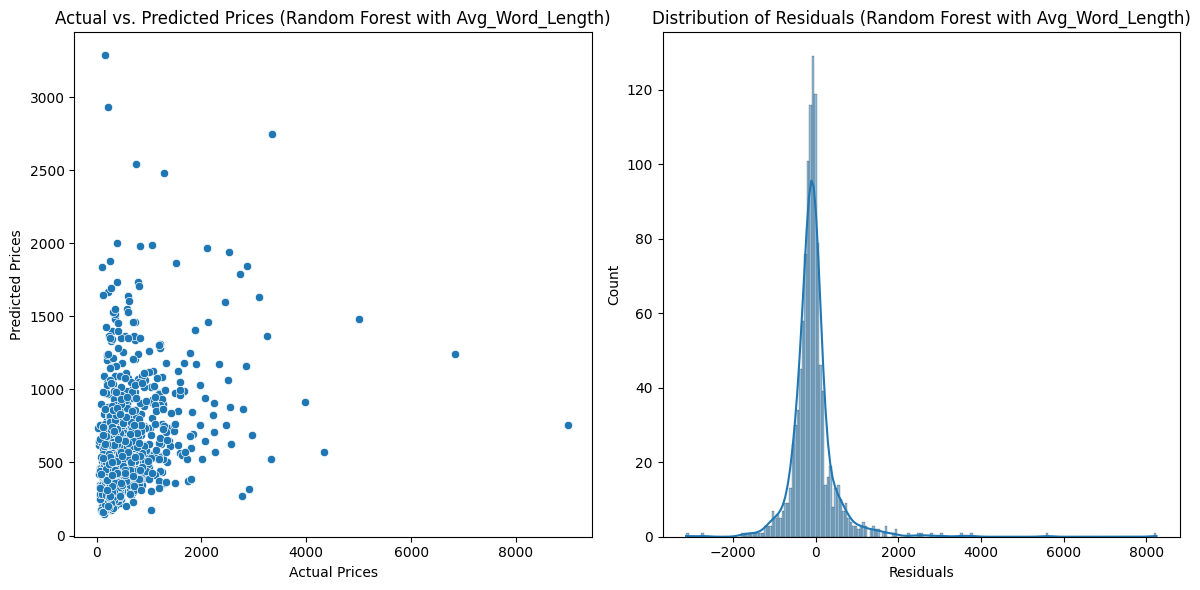

In [33]:
# Visualize actual vs. predicted prices for the Random Forest model with 'Avg_Word_Length'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_with_avg_word_length, y=predictions_rf_with_avg_word_length)
plt.title('Actual vs. Predicted Prices (Random Forest with Avg_Word_Length)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Visualize the distribution of residuals
plt.subplot(1, 2, 2)
residuals_rf_with_avg_word_length = y_test_with_avg_word_length - predictions_rf_with_avg_word_length
sns.histplot(residuals_rf_with_avg_word_length, kde=True)
plt.title('Distribution of Residuals (Random Forest with Avg_Word_Length)')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()


### Price Transformation

In [34]:
import numpy as np

# Feature Engineering - Logarithmic Transformation of Price
data['Log_Price'] = np.log1p(data['Price'])

# Select relevant features including the transformed target variable
features_with_log_price = ['Reviews', 'Ratings', 'Title_Length', 'Synopsis_Length', 'Avg_Word_Length']
target_variable = 'Log_Price'

# Split into X and y
X_with_log_price = data[features_with_log_price]
y_with_log_price = data[target_variable]

# Train-test split
X_train_with_log_price, X_test_with_log_price, y_train_with_log_price, y_test_with_log_price = train_test_split(
    X_with_log_price, y_with_log_price, test_size=0.2, random_state=42
)

# Train the Random Forest model with the transformed target variable 'Log_Price'
model_rf_with_log_price = RandomForestRegressor(random_state=42)
model_rf_with_log_price.fit(X_train_with_log_price, y_train_with_log_price)

# Make predictions on the test set
predictions_rf_with_log_price = model_rf_with_log_price.predict(X_test_with_log_price)

# Transform the predictions back to the original scale
predictions_original_scale_with_log_price = np.expm1(predictions_rf_with_log_price)

# Evaluate the Random Forest model with the transformed target variable 'Log_Price'
mae_rf_with_log_price = mean_absolute_error(data['Price'][y_test_with_log_price.index], predictions_original_scale_with_log_price)
mse_rf_with_log_price = mean_squared_error(data['Price'][y_test_with_log_price.index], predictions_original_scale_with_log_price)
rmse_rf_with_log_price = mean_squared_error(data['Price'][y_test_with_log_price.index], predictions_original_scale_with_log_price, squared=False)
r2_rf_with_log_price = r2_score(data['Price'][y_test_with_log_price.index], predictions_original_scale_with_log_price)

# Print the evaluation metrics for the Random Forest model with the transformed target variable 'Log_Price'
print(f"Random Forest Model With Log Price - Mean Absolute Error (MAE): {mae_rf_with_log_price:.2f}")
print(f"Random Forest Model With Log Price - Mean Squared Error (MSE): {mse_rf_with_log_price:.2f}")
print(f"Random Forest Model With Log Price - Root Mean Squared Error (RMSE): {rmse_rf_with_log_price:.2f}")
print(f"Random Forest Model With Log Price - R-squared (R2): {r2_rf_with_log_price:.2f}")


Random Forest Model With Log Price - Mean Absolute Error (MAE): 264.32
Random Forest Model With Log Price - Mean Squared Error (MSE): 306059.97
Random Forest Model With Log Price - Root Mean Squared Error (RMSE): 553.23
Random Forest Model With Log Price - R-squared (R2): 0.15


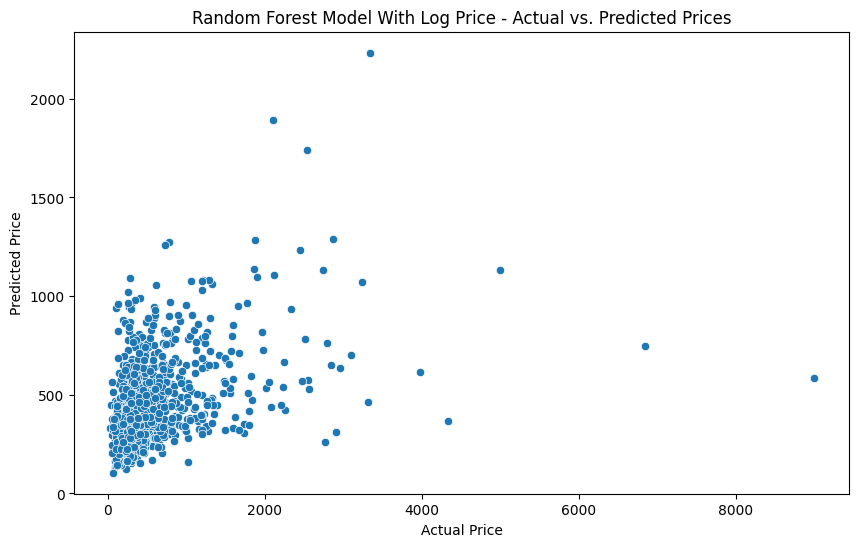

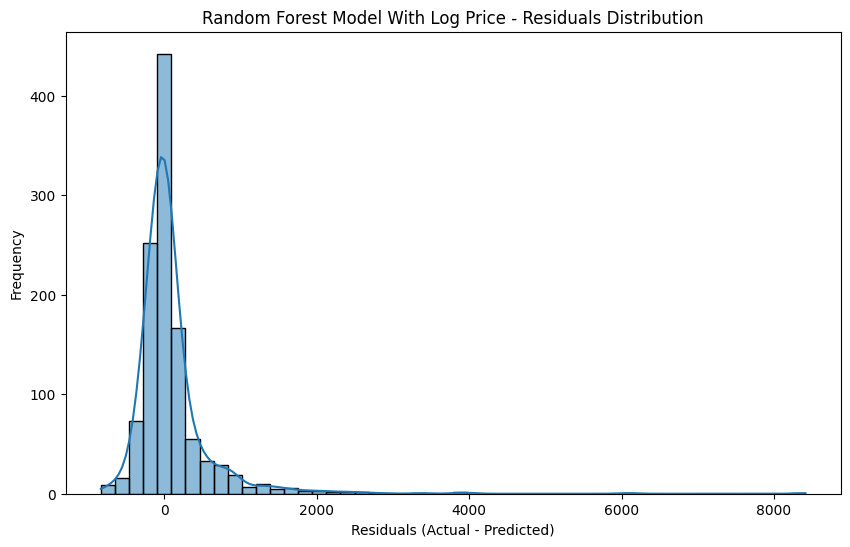

In [35]:
# Scatter plot: Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Price'][y_test_with_log_price.index], y=predictions_original_scale_with_log_price)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Model With Log Price - Actual vs. Predicted Prices')
plt.show()

# Histogram: Residuals Distribution
residuals_with_log_price = data['Price'][y_test_with_log_price.index] - predictions_original_scale_with_log_price
plt.figure(figsize=(10, 6))
sns.histplot(residuals_with_log_price, bins=50, kde=True)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Random Forest Model With Log Price - Residuals Distribution')
plt.show()